In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [10]:
# set up dataframe
df = pd.read_csv('../data/clean/bilinear-interpolation.csv')

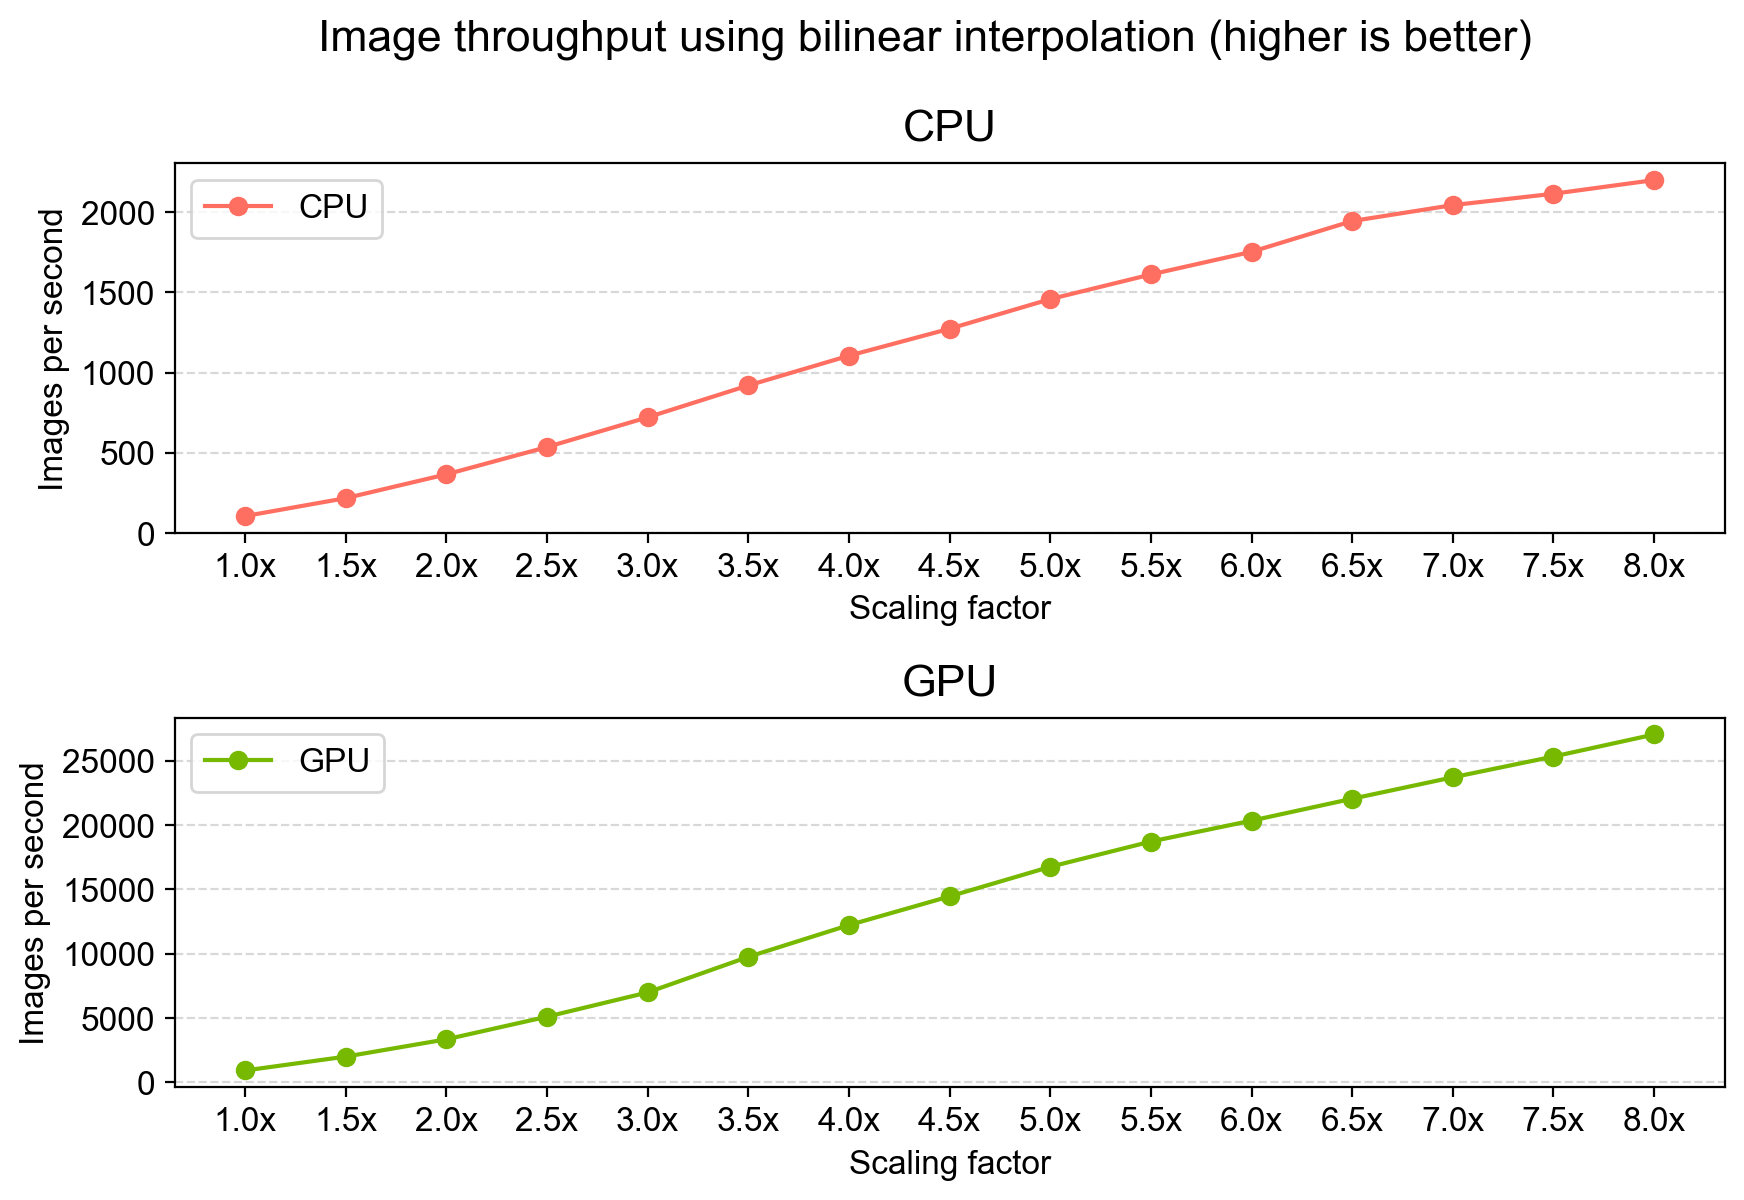

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle("Image throughput using bilinear interpolation (higher is better)", fontsize=16,y=1)

ax: plt.Axes
for ax, case in zip(axs.flatten(), ['cpu', 'gpu']):
  ax.set_title(case.upper(), pad=8, size=16)
  ax.set_axisbelow(True)

  cases = np.arange(1, 16)
  ax.set_xticks(cases - 1, [f'{(x / 2) + 0.5}x' for x in cases])
  ax.set_xlabel("Scaling factor")

  step = 5000 if case == 'gpu' else 500
  yticks = np.arange(0, step * 10, step)
  ax.set_yticks(yticks)
  ax.set_ylabel("Images per second")
  ax.grid(axis='y', which='major', visible=True, linestyle='--', color='grey', alpha=0.3)

  ax.plot(df[case], label=case.upper(), linestyle='-', marker='o', color='#76B900' if case == 'gpu' else '#FF6F61')
  ax.legend()
